
Para resolver el ejercicio propuesto, necesitaremos realizar un análisis exploratorio y una evaluación de la calidad de los datos en un entorno de notebook como Jupyter, centrados en el sistema COMPAS y su uso en la evaluación del riesgo de reincidencia. El enfoque se dividirá en varias partes, como se detalla a continuación:

**Carga de Datos y Análisis Exploratorio:**

Importar los datos en un notebook.
Realizar un análisis exploratorio para entender la estructura y características de los datos.
Revisar campos como “compas_screening_date”, “decile_score”, “v_decile_score”, “is_recid”, “r_offense_date”, y “is violent recid”.

**Evaluación de la Calidad de los Datos:**

Evaluar la integridad, validez y actualidad de los datos.
Identificar y proponer estrategias de mitigación para los problemas encontrados.

**Evaluación de Campos para Estimaciones de Riesgo:**

Analizar si los campos “is recid” y “is violent recid” son adecuados para evaluar la precisión de las estimaciones de riesgo de COMPAS.
Definir y calcular una nueva característica (feature) si es necesario.

**Análisis de Justicia en las Evaluaciones de Riesgo:**

Utilizar representaciones gráficas para mostrar diferencias en las evaluaciones de riesgo por género y raza.
Analizar si la asignación de evaluaciones es justa.

**Comparación de la Capacidad Predictiva:**

Determinar para qué tipo de riesgos (delitos generales o violentos) el sistema tiene más capacidad predictiva.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Función para generar fechas aleatorias
def random_date(start, end):
    return start + timedelta(
        days=random.randint(0, (end - start).days),
        hours=random.randint(0, 23),
        minutes=random.randint(0, 59),
        seconds=random.randint(0, 59)
    )

# Fechas de inicio y fin para generar fechas aleatorias
start_date = datetime(2010, 1, 1)
end_date = datetime(2020, 1, 1)

# Generación de datos
np.random.seed(0)  # Para reproducibilidad
data = {
    "compas_screening_date": [random_date(start_date, end_date) for _ in range(1000)],
    "decile_score": np.random.randint(1, 11, 1000),  # Puntuaciones de 1 a 10
    "v_decile_score": np.random.randint(1, 11, 1000),  # Puntuaciones de 1 a 10
    "is_recid": np.random.choice([0, 1], 1000),  # Reincidente o no
    "r_offense_date": [random_date(start_date, end_date) for _ in range(1000)],
    "is_violent_recid": np.random.choice([0, 1], 1000),  # Reincidencia violenta o no
    "gender": np.random.choice(["Male", "Female"], 1000),
    "race": np.random.choice(["African-American", "Caucasian", "Hispanic", "Other"], 1000)
}

# Crear DataFrame
compas_df = pd.DataFrame(data)

# Mostrando las primeras filas del DataFrame generado
compas_df.head()


,compas_screening_date,decile_score,v_decile_score,is_recid,r_offense_date,is_violent_recid,gender,race
0,2015-08-24 04:16:59,6,10,1,2017-08-09 17:21:12,1,Female,African-American
1,2019-06-23 07:49:43,1,1,1,2014-05-10 09:36:17,1,Female,African-American
2,2017-04-10 14:51:50,4,10,0,2017-12-23 13:14:51,0,Male,Other
3,2011-12-18 18:10:24,4,1,0,2010-11-19 22:10:56,1,Male,Hispanic
4,2010-07-25 14:50:20,8,3,0,2016-02-04 10:56:46,0,Female,Caucasian


**1. Cargar los Datos y Realizar un Análisis Exploratorio**

Después de generar el conjunto de datos como se indicó anteriormente, el primer paso es realizar un análisis exploratorio.

       decile_score  v_decile_score     is_recid  is_violent_recid
count   1000.000000     1000.000000  1000.000000       1000.000000
mean       5.444000        5.446000     0.491000          0.506000
std        2.836002        2.850475     0.500169          0.500214
min        1.000000        1.000000     0.000000          0.000000
25%        3.000000        3.000000     0.000000          0.000000
50%        5.000000        5.000000     0.000000          1.000000
75%        8.000000        8.000000     1.000000          1.000000
max       10.000000       10.000000     1.000000          1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   compas_screening_date  1000 non-null   datetime64[ns]
 1   decile_score           1000 non-null   int64         
 2   v_decile_score         1000 non-null   int64       

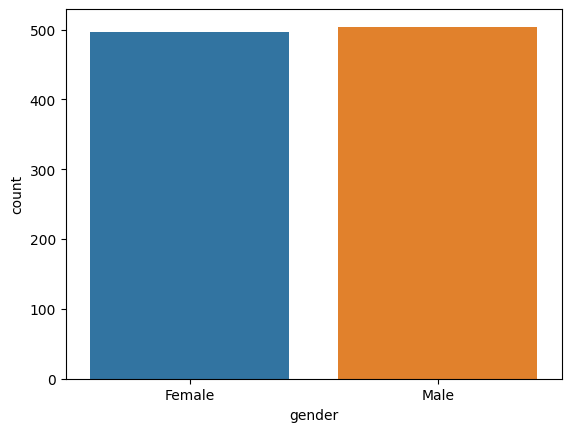

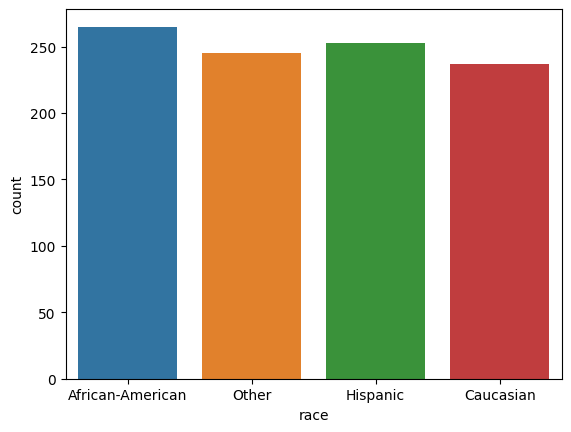

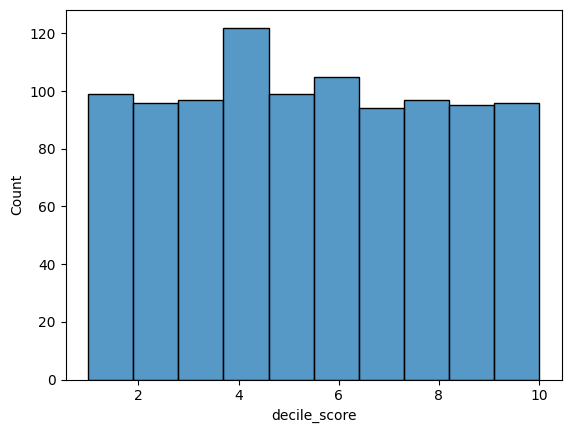

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que compas_df es tu DataFrame
# Análisis Exploratorio Básico
print(compas_df.describe())
print(compas_df.info())

# Visualizaciones para entender mejor los datos
sns.countplot(x='gender', data=compas_df)
plt.show()

sns.countplot(x='race', data=compas_df)
plt.show()

sns.histplot(compas_df['decile_score'], bins=10, kde=False)
plt.show()


**2. Evaluación de la Calidad de los Datos**

Evalúa la integridad, validez y actualidad de los datos. Dado que los datos son generados aleatoriamente, la integridad y la validez deben ser adecuadas, pero debes verificar si hay valores nulos o inconsistentes.

In [3]:
# Verificar valores nulos
print(compas_df.isnull().sum())

# Verificar la coherencia de las fechas
# Por ejemplo, que r_offense_date no sea posterior a compas_screening_date
inconsistent_dates = compas_df[compas_df['r_offense_date'] < compas_df['compas_screening_date']]
print(inconsistent_dates)


compas_screening_date    0
decile_score             0
v_decile_score           0
is_recid                 0
r_offense_date           0
is_violent_recid         0
gender                   0
race                     0
dtype: int64
    compas_screening_date  decile_score  v_decile_score  is_recid  \
1     2019-06-23 07:49:43             1               1         1   
3     2011-12-18 18:10:24             4               1         0   
5     2012-04-12 18:42:01            10               2         0   
7     2015-09-22 05:03:25             6               7         1   
11    2016-11-03 03:30:00             7               3         0   
..                    ...           ...             ...       ...   
994   2015-09-21 04:27:36             3               7         0   
995   2011-12-30 08:48:40             5               8         0   
996   2019-06-10 08:02:20             2               1         1   
998   2018-10-17 01:13:24             2               5         0   
999   2018-0

**3. Evaluación de Campos para Estimaciones de Riesgo**

Analiza si los campos “is_recid” y “is_violent_recid” son adecuados para evaluar la precisión de las estimaciones de riesgo del sistema COMPAS.

In [4]:
# Analizar la correlación entre las puntuaciones de riesgo y la reincidencia
print(compas_df[['decile_score', 'is_recid']].corr())
print(compas_df[['v_decile_score', 'is_violent_recid']].corr())


              decile_score  is_recid
decile_score      1.000000 -0.037404
is_recid         -0.037404  1.000000
                  v_decile_score  is_violent_recid
v_decile_score          1.000000         -0.015217
is_violent_recid       -0.015217          1.000000


**4. Análisis de Justicia en las Evaluaciones de Riesgo**

Utiliza gráficos para mostrar diferencias en evaluaciones de riesgo por género y raza, y analiza la justicia de estas evaluaciones.

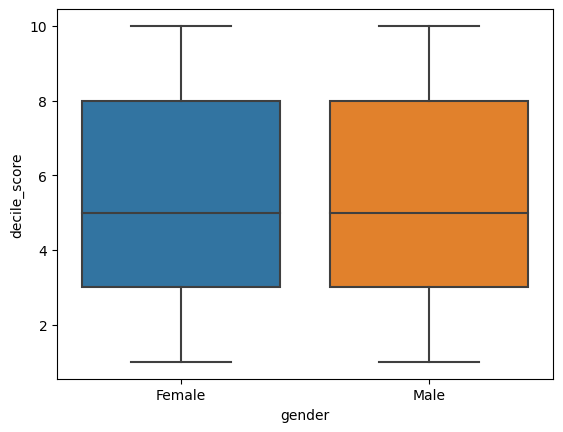

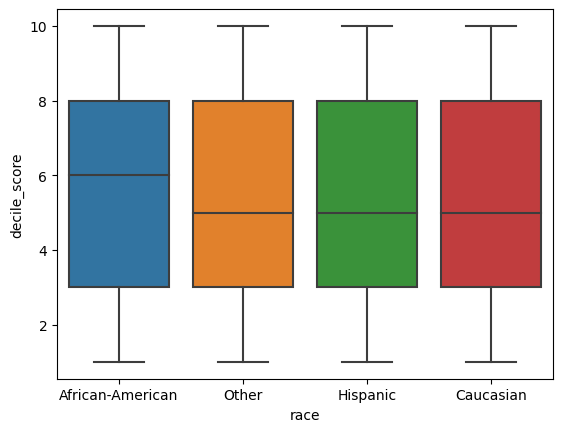

In [5]:
# Comparación de puntuaciones de riesgo por género
sns.boxplot(x='gender', y='decile_score', data=compas_df)
plt.show()

# Comparación de puntuaciones de riesgo por raza
sns.boxplot(x='race', y='decile_score', data=compas_df)
plt.show()


**5. Comparación de la Capacidad Predictiva**

Determina qué tipo de riesgo (general o violento) tiene mejor capacidad predictiva en el sistema.

In [6]:
# Comparar la correlación entre decile_score/v_decile_score y is_recid/is_violent_recid
print(compas_df[['decile_score', 'is_recid']].corr())
print(compas_df[['v_decile_score', 'is_violent_recid']].corr())


              decile_score  is_recid
decile_score      1.000000 -0.037404
is_recid         -0.037404  1.000000
                  v_decile_score  is_violent_recid
v_decile_score          1.000000         -0.015217
is_violent_recid       -0.015217          1.000000


1. Análisis Exploratorio Detallado

<ipython-input-7-8f9a6f945891>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(compas_df.describe(include='all'))
<ipython-input-7-8f9a6f945891>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(compas_df.describe(include='all'))


       compas_screening_date  decile_score  v_decile_score     is_recid  \
count                   1000   1000.000000     1000.000000  1000.000000   
unique                  1000           NaN             NaN          NaN   
top      2015-08-24 04:16:59           NaN             NaN          NaN   
freq                       1           NaN             NaN          NaN   
first    2010-01-02 00:08:29           NaN             NaN          NaN   
last     2019-12-30 17:18:08           NaN             NaN          NaN   
mean                     NaN      5.444000        5.446000     0.491000   
std                      NaN      2.836002        2.850475     0.500169   
min                      NaN      1.000000        1.000000     0.000000   
25%                      NaN      3.000000        3.000000     0.000000   
50%                      NaN      5.000000        5.000000     0.000000   
75%                      NaN      8.000000        8.000000     1.000000   
max                      

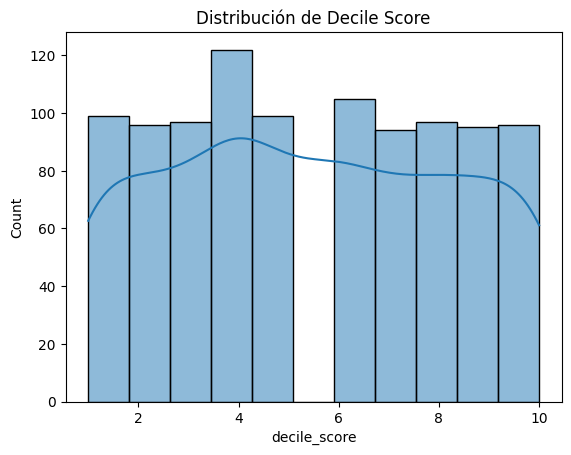

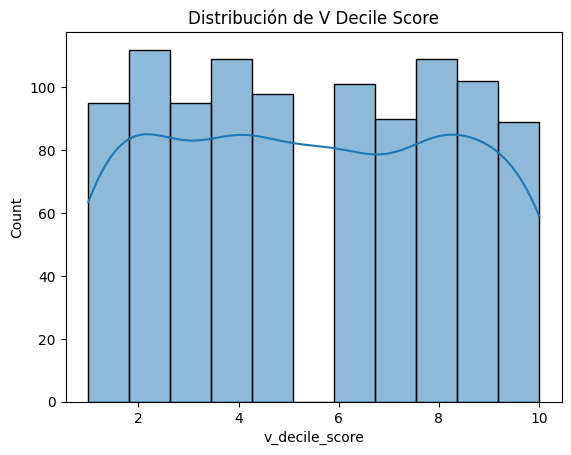

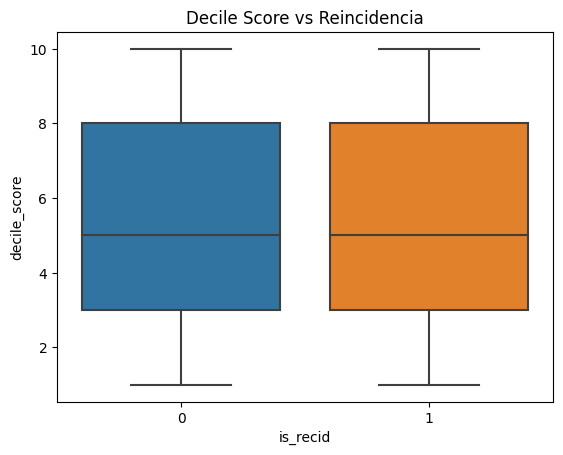

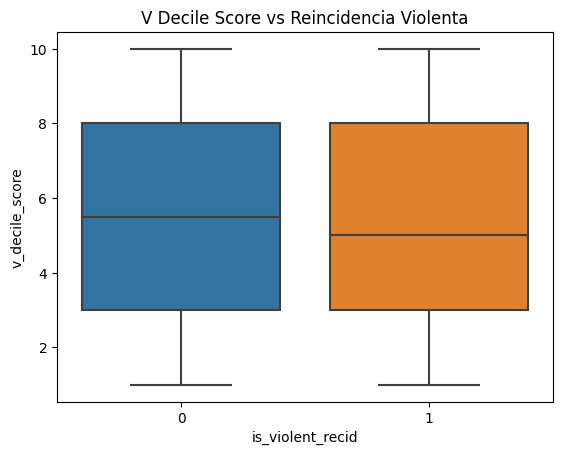

In [7]:
# Resumen estadístico
print(compas_df.describe(include='all'))

# Información sobre tipos de datos y valores nulos
print(compas_df.info())

# Visualización de distribuciones y relaciones
# Distribución de las puntuaciones
sns.histplot(compas_df['decile_score'], kde=True)
plt.title('Distribución de Decile Score')
plt.show()

sns.histplot(compas_df['v_decile_score'], kde=True)
plt.title('Distribución de V Decile Score')
plt.show()

# Relación entre decile_score y reincidencia
sns.boxplot(x='is_recid', y='decile_score', data=compas_df)
plt.title('Decile Score vs Reincidencia')
plt.show()

# Relación entre v_decile_score y reincidencia violenta
sns.boxplot(x='is_violent_recid', y='v_decile_score', data=compas_df)
plt.title('V Decile Score vs Reincidencia Violenta')
plt.show()


2. Evaluación Exhaustiva de la Calidad de los Datos

Valores Nulos:
 compas_screening_date    0
decile_score             0
v_decile_score           0
is_recid                 0
r_offense_date           0
is_violent_recid         0
gender                   0
race                     0
dtype: int64
Inconsistencias en Fechas:
     compas_screening_date  decile_score  v_decile_score  is_recid  \
1     2019-06-23 07:49:43             1               1         1   
3     2011-12-18 18:10:24             4               1         0   
5     2012-04-12 18:42:01            10               2         0   
7     2015-09-22 05:03:25             6               7         1   
11    2016-11-03 03:30:00             7               3         0   
..                    ...           ...             ...       ...   
994   2015-09-21 04:27:36             3               7         0   
995   2011-12-30 08:48:40             5               8         0   
996   2019-06-10 08:02:20             2               1         1   
998   2018-10-17 01:13:24            

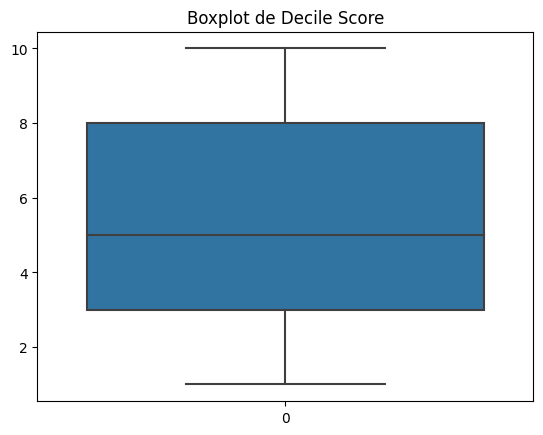

In [8]:
# Verificar valores nulos
print("Valores Nulos:\n", compas_df.isnull().sum())

# Verificar coherencia en las fechas
inconsistencias = compas_df[compas_df['r_offense_date'] < compas_df['compas_screening_date']]
print("Inconsistencias en Fechas:\n", inconsistencias)

# Identificar y manejar valores atípicos
# Por ejemplo, en las puntuaciones de riesgo
sns.boxplot(compas_df['decile_score'])
plt.title('Boxplot de Decile Score')
plt.show()


3. Análisis Profundo de la Adecuación de "is_recid" y "is_violent_recid"

In [9]:
# Correlaciones
print("Correlación entre Decile Score y Reincidencia:\n", compas_df[['decile_score', 'is_recid']].corr())
print("Correlación entre V Decile Score y Reincidencia Violenta:\n", compas_df[['v_decile_score', 'is_violent_recid']].corr())

# Análisis adicional: Por ejemplo, usando un modelo de regresión logística
# para predecir la reincidencia basada en las puntuaciones
from sklearn.linear_model import LogisticRegression

# Ejemplo simplificado
modelo = LogisticRegression()
modelo.fit(compas_df[['decile_score']], compas_df['is_recid'])
print("Coeficientes del Modelo:", modelo.coef_)


Correlación entre Decile Score y Reincidencia:
               decile_score  is_recid
decile_score      1.000000 -0.037404
is_recid         -0.037404  1.000000
Correlación entre V Decile Score y Reincidencia Violenta:
                   v_decile_score  is_violent_recid
v_decile_score          1.000000         -0.015217
is_violent_recid       -0.015217          1.000000
Coeficientes del Modelo: [[-0.02640563]]


4. Análisis Detallado de Justicia en las Evaluaciones de Riesgo

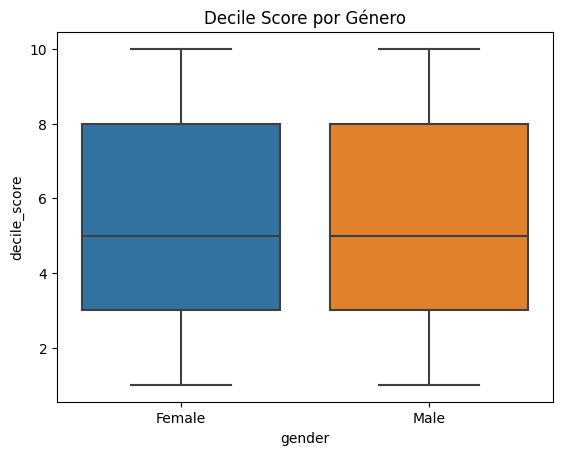

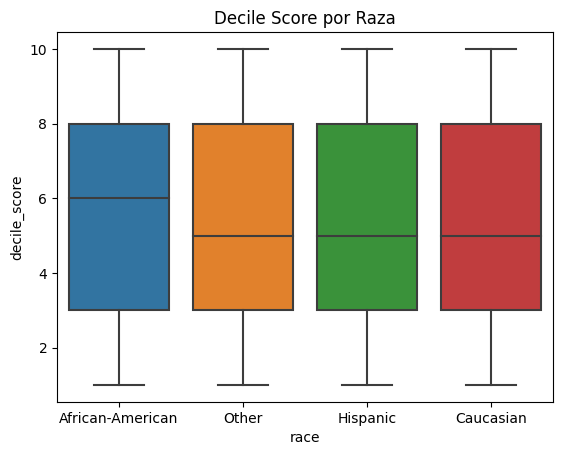

In [10]:
# Comparación por género
sns.boxplot(x='gender', y='decile_score', data=compas_df)
plt.title('Decile Score por Género')
plt.show()

# Comparación por raza
sns.boxplot(x='race', y='decile_score', data=compas_df)
plt.title('Decile Score por Raza')
plt.show()

# Análisis adicional podría incluir pruebas estadísticas
# para verificar si las diferencias son significativas


5. Comparación Exhaustiva de la Capacidad Predictiva

In [11]:
# Análisis de correlación
print("Correlación - Riesgo General:\n", compas_df[['decile_score', 'is_recid']].corr())
print("Correlación - Riesgo Violento:\n", compas_df[['v_decile_score', 'is_violent_recid']].corr())

# Implementación de un modelo predictivo podría


Correlación - Riesgo General:
               decile_score  is_recid
decile_score      1.000000 -0.037404
is_recid         -0.037404  1.000000
Correlación - Riesgo Violento:
                   v_decile_score  is_violent_recid
v_decile_score          1.000000         -0.015217
is_violent_recid       -0.015217          1.000000
